# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.impute import KNNImputer




In [2]:
Self_harm_EDA = pd.read_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_EDA.csv', index_col=0)
Self_harm_EDA 

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population
6,Male,White Non-Hispanice,00-04,2001,0,5862483
7,Male,Black,00-04,2001,0,1585658
8,Male,Hispanic,00-04,2001,0,1900490
9,Male,Other Non-Hispanic,00-04,2001,0,518145
11,Female,White Non-Hispanice,00-04,2001,0,5572690
...,...,...,...,...,...,...
5780,Male,Other Non-Hispanic,85+,2018,0,116478
5783,Female,White Non-Hispanice,85+,2018,0,3349454
5784,Female,Black,85+,2018,0,366329
5785,Female,Hispanic,85+,2018,0,304983



Above all, we know that most of our data is categorical features. So the first thing I want to do is create a dummy variable for all categorical features.

Since I loaded my data with pandas, I am going to use the pandas function pd.get_dummies for my first categorical variable sex. Since this variable has only two answer choices: male and female, pd.get_dummies creates a new dataframe which consists of zeros and ones. The dataframe will have a one depending on the sex.

# 1.Encoding categorical variables

In [3]:
#Turn the column of sex into dummy variable 
dummy = pd.get_dummies(Self_harm_EDA['Sex'])
dummy.head()

,Female,Male
6,0,1
7,0,1
8,0,1
9,0,1
11,1,0


Since I’ve created a whole new dataframe, in order to compare it to my original dataframe, I am going to need to either merge or concatenate them to work with them properly. In creating dummy variables, I essentially created new columns for my original dataset. The old and new dataset don’t have any columns in common, so it would make most sense to concatenate them instead of merging.
I chose to put my dummy variable on the right side of my dataframe so when I use pd.concat (the concatenation function) and put my dataframe first, and then the dummy variable I declared. As they are columns, I concatenate them on axis=1.

In [4]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy], axis=1)
Self_harm_EDA.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1
7,Male,Black,00-04,2001,0,1585658,0,1
8,Male,Hispanic,00-04,2001,0,1900490,0,1
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0



Likewise, I will create a dummy variable in the other two features 'Race/Ethnicity' and 'Age Group'.

In [5]:
dummy1 = pd.get_dummies(Self_harm_EDA['Race/Ethnicity'])
dummy1.head()

,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice
6,0,0,0,1
7,1,0,0,0
8,0,1,0,0
9,0,0,1,0
11,0,0,0,1


In [6]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy1], axis=1)
Self_harm_EDA.head()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice
6,Male,White Non-Hispanice,00-04,2001,0,5862483,0,1,0,0,0,1
7,Male,Black,00-04,2001,0,1585658,0,1,1,0,0,0
8,Male,Hispanic,00-04,2001,0,1900490,0,1,0,1,0,0
9,Male,Other Non-Hispanic,00-04,2001,0,518145,0,1,0,0,1,0
11,Female,White Non-Hispanice,00-04,2001,0,5572690,1,0,0,0,0,1


In [7]:
dummy2 = pd.get_dummies(Self_harm_EDA['Age Group'])
dummy2.head()

,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Self_harm_EDA = pd.concat([Self_harm_EDA, dummy2], axis=1)

Self_harm_EDA.tail()

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
5780,Male,Other Non-Hispanic,85+,2018,0,116478,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5783,Female,White Non-Hispanice,85+,2018,0,3349454,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5784,Female,Black,85+,2018,0,366329,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5785,Female,Hispanic,85+,2018,0,304983,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5786,Female,Other Non-Hispanic,85+,2018,0,198044,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 2. Imputing Missing Values

In [9]:
Self_harm_EDA.isna().sum()

Sex                     0
Race/Ethnicity         39
Age Group               0
Year                    0
Injuries                0
Population              0
Female                  0
Male                    0
Black                   0
Hispanic                0
Other Non-Hispanic      0
White Non-Hispanice     0
00-04                   0
05-09                   0
10-14                   0
15-19                   0
20-24                   0
25-29                   0
30-34                   0
35-39                   0
40-44                   0
45-49                   0
50-54                   0
55-59                   0
60-64                   0
65-69                   0
70-74                   0
75-79                   0
80-84                   0
85+                     0
dtype: int64

In [10]:
Self_harm_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 6 to 5786
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sex                  2631 non-null   object
 1   Race/Ethnicity       2592 non-null   object
 2   Age Group            2631 non-null   object
 3   Year                 2631 non-null   int64 
 4   Injuries             2631 non-null   int64 
 5   Population           2631 non-null   int64 
 6   Female               2631 non-null   uint8 
 7   Male                 2631 non-null   uint8 
 8   Black                2631 non-null   uint8 
 9   Hispanic             2631 non-null   uint8 
 10  Other Non-Hispanic   2631 non-null   uint8 
 11  White Non-Hispanice  2631 non-null   uint8 
 12  00-04                2631 non-null   uint8 
 13  05-09                2631 non-null   uint8 
 14  10-14                2631 non-null   uint8 
 15  15-19                2631 non-null   uint8 
 16  20-24 

In [11]:
#Impute Race/Ethnicity
Self_harm_EDA['Race/Ethnicity'].fillna('Race/Ethnicity', inplace=True)

In [12]:
Self_harm_EDA.isna().sum()

Sex                    0
Race/Ethnicity         0
Age Group              0
Year                   0
Injuries               0
Population             0
Female                 0
Male                   0
Black                  0
Hispanic               0
Other Non-Hispanic     0
White Non-Hispanice    0
00-04                  0
05-09                  0
10-14                  0
15-19                  0
20-24                  0
25-29                  0
30-34                  0
35-39                  0
40-44                  0
45-49                  0
50-54                  0
55-59                  0
60-64                  0
65-69                  0
70-74                  0
75-79                  0
80-84                  0
85+                    0
dtype: int64

In [13]:
Self_harm_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 6 to 5786
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sex                  2631 non-null   object
 1   Race/Ethnicity       2631 non-null   object
 2   Age Group            2631 non-null   object
 3   Year                 2631 non-null   int64 
 4   Injuries             2631 non-null   int64 
 5   Population           2631 non-null   int64 
 6   Female               2631 non-null   uint8 
 7   Male                 2631 non-null   uint8 
 8   Black                2631 non-null   uint8 
 9   Hispanic             2631 non-null   uint8 
 10  Other Non-Hispanic   2631 non-null   uint8 
 11  White Non-Hispanice  2631 non-null   uint8 
 12  00-04                2631 non-null   uint8 
 13  05-09                2631 non-null   uint8 
 14  10-14                2631 non-null   uint8 
 15  15-19                2631 non-null   uint8 
 16  20-24 

Here I can see that we had 39 missing values in Race/Ethnicity column. I will impute those values instead of dropping the rows because i do not want to lose more data. 

# 3.Scaling numerical features

Now, I want to scale some of my features. Since Most of my features are categorical and we created dummy variables i do not want to sclae them. I only want to scale my integer features which are 'Injuries', 'Population'.

In [14]:
Self_harm_cleaned = Self_harm_EDA.copy()#Create a copy of data frame
col_names = ['Injuries', 'Population'] #Include only int features 'Injuries', 'Population'
features = Self_harm_cleaned[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
Self_harm_cleaned[col_names] = features# Do not create a new dataframe but asign the results to those two columns.
Self_harm_cleaned

,Sex,Race/Ethnicity,Age Group,Year,Injuries,Population,Female,Male,Black,Hispanic,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
6,Male,White Non-Hispanice,00-04,2001,-0.404547,1.695110,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Male,Black,00-04,2001,-0.404547,-0.231957,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Male,Hispanic,00-04,2001,-0.404547,-0.090099,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Male,Other Non-Hispanic,00-04,2001,-0.404547,-0.712961,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Female,White Non-Hispanice,00-04,2001,-0.404547,1.564534,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5780,Male,Other Non-Hispanic,85+,2018,-0.404547,-0.893945,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5783,Female,White Non-Hispanice,85+,2018,-0.404547,0.562780,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5784,Female,Black,85+,2018,-0.404547,-0.781367,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5785,Female,Hispanic,85+,2018,-0.404547,-0.809008,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
Self_harm_final = Self_harm_cleaned.copy()#Create a copy of data frame
col_names = [ 'Year','Injuries', 'Population',
       'Female', 'Male', 'Black', 'Hispanic', 'Other Non-Hispanic',
       'White Non-Hispanice', '00-04', '05-09', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84','85+'] #Include only int features 
df = Self_harm_final[col_names]
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 6 to 5786
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 2631 non-null   int64
 1   Injuries             2631 non-null   int64
 2   Population           2631 non-null   int64
 3   Female               2631 non-null   int64
 4   Male                 2631 non-null   int64
 5   Black                2631 non-null   int64
 6   Hispanic             2631 non-null   int64
 7   Other Non-Hispanic   2631 non-null   int64
 8   White Non-Hispanice  2631 non-null   int64
 9   00-04                2631 non-null   int64
 10  05-09                2631 non-null   int64
 11  10-14                2631 non-null   int64
 12  15-19                2631 non-null   int64
 13  20-24                2631 non-null   int64
 14  25-29                2631 non-null   int64
 15  30-34                2631 non-null   int64
 16  35-39                263

# 4. Normalizing the Dataset

This is the last part of data preprocessing, which is the normalization of my the dataset. It is proven from certain experimentation that Machine Learning and Deep Learning Models perform way better on a normalized data set as compared to a data set that is not normalized therefore i want to normalize my dataset. 
The goal of normalization here is to change values to a common scale without distorting the difference between the range of values.

In [16]:
Self_harm_cleaned.columns

Index(['Sex', 'Race/Ethnicity', 'Age Group', 'Year', 'Injuries', 'Population',
       'Female', 'Male', 'Black', 'Hispanic', 'Other Non-Hispanic',
       'White Non-Hispanice', '00-04', '05-09', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84', '85+'],
      dtype='object')

In [17]:
Self_harm_final = Self_harm_cleaned.copy()#Create a copy of data frame
col_names = [ 'Year','Injuries', 'Population',
       'Female', 'Male', 'Black', 'Hispanic', 'Other Non-Hispanic',
       'White Non-Hispanice', '00-04', '05-09', '10-14', '15-19', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80-84','85+'] #Include only int features 
df = Self_harm_final[col_names]
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 6 to 5786
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 2631 non-null   int64
 1   Injuries             2631 non-null   int64
 2   Population           2631 non-null   int64
 3   Female               2631 non-null   int64
 4   Male                 2631 non-null   int64
 5   Black                2631 non-null   int64
 6   Hispanic             2631 non-null   int64
 7   Other Non-Hispanic   2631 non-null   int64
 8   White Non-Hispanice  2631 non-null   int64
 9   00-04                2631 non-null   int64
 10  05-09                2631 non-null   int64
 11  10-14                2631 non-null   int64
 12  15-19                2631 non-null   int64
 13  20-24                2631 non-null   int64
 14  25-29                2631 non-null   int64
 15  30-34                2631 non-null   int64
 16  35-39                263

In [18]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

df.iloc[:,1:-1] = norm.fit_transform(df.iloc[:,1:-1])

df.tail()

,Year,Injuries,Population,Female,Male,Black,Hispanic,Other Non-Hispanic,White Non-Hispanice,00-04,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
5780,2018,0.0,0.0,0.000000,0.707107,0.000000,0.000000,0.707107,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5783,2018,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5784,2018,0.0,0.0,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5785,2018,0.0,0.0,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5786,2018,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Splitting of the data set in Training and Validation sets

In [19]:
len(df) * .8, len(df) * .2

(2104.8, 526.2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Injuries'), 
                                                    df.Injuries, test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((2104, 26), (527, 26))

In [22]:
y_train.shape, y_test.shape

((2104,), (527,))

Here I have passed-in X and y as arguments in train_test_split, which splits X and y such that there is 20% testing data and 80% training data successfully split between X_train, X_test, y_train, and y_test.

In [23]:
X = df.drop('Injuries', axis=1)
y = df.Injuries

In [24]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)

Coefficients:  [ 1.55337582e-04 -5.88249508e-01 -3.95564248e+10 -3.95564248e+10
 -6.38907358e-01 -6.40506013e-01 -6.42439867e-01 -5.42713350e-01
  3.95564248e+10  3.95564248e+10  3.95564248e+10  3.95564248e+10
  3.95564248e+10  3.95564248e+10  3.95564248e+10  3.95564248e+10
  3.95564248e+10  3.95564248e+10  3.95564248e+10  3.95564248e+10
  3.95564248e+10  3.95564248e+10  3.95564248e+10  3.95564248e+10
  3.95564248e+10  2.79706162e+10]


In [25]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.8882513429556936


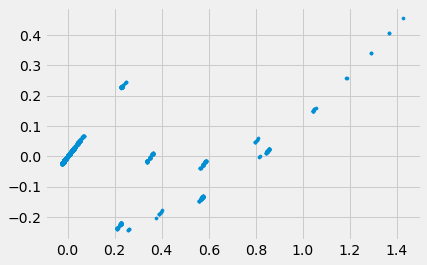

In [26]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            s = 10, label = 'Train data')

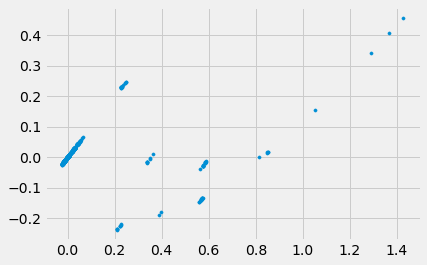

In [27]:
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, s = 10, label = 'Test data')